In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 90)
pd.set_option("display.max_rows", 40)

In [2]:
df=pd.read_csv('used cars regression.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
df.drop(['New_Price','Unnamed: 0'],axis=1,inplace=True)

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [5]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [6]:
df['Owner_Type']=df['Owner_Type'].replace({'First':1, 'Second':2, 'Fourth & Above':4, 'Third':3})
df['Transmission'].replace({'Manual':0, 'Automatic':1},inplace=True)
df['Owner_Type'].unique(),df['Transmission'].unique()

(array([1, 2, 4, 3], dtype=int64), array([0, 1], dtype=int64))

In [7]:
df['Engine'].replace(np.nan,'0 CC',inplace=True)
arr=df['Engine'].str.split(expand=True).iloc[:,[0]]
arr=arr.astype(int)
df['Engine']=arr
df['Engine'].replace(0,np.nan,inplace=True)

In [8]:
df['Power'].replace('null bhp','0 bhp',inplace=True)
arr1=df['Power'].str.split(expand=True).iloc[:,[0]]
arr1=arr1.astype(float)
df['Power']=arr1
df['Power'].replace(0,np.nan,inplace=True)

In [9]:
arr2=df['Mileage'].str.split(expand=True).iloc[:,[0]]
arr2=arr2.astype(float)
df['Mileage']=arr2
df['Mileage'].replace(0,np.nan,inplace=True)

In [10]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [11]:
df['Brands']=df['Name'].str.split(expand=True).iloc[:,0].replace('Isuzu','ISUZU')
df['Brands'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'ISUZU', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

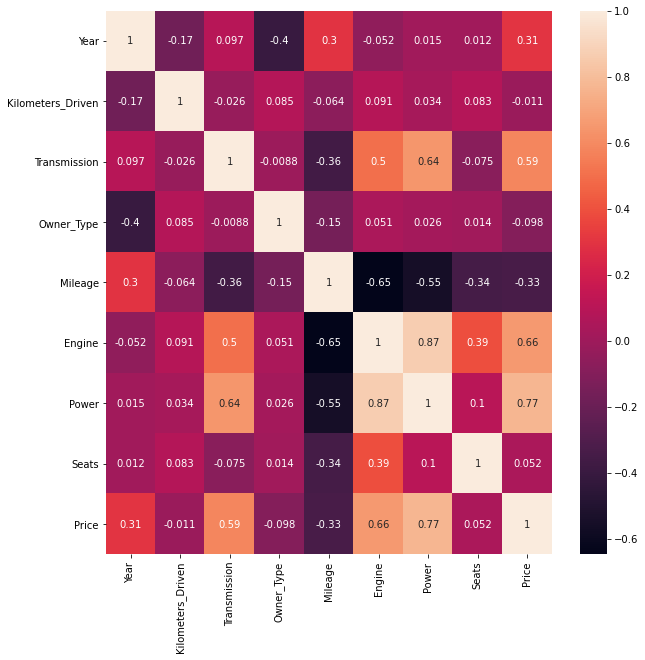

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [13]:
df.describe()

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,5949.000000,5983.000000,5876.000000,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,0.285762,1.202858,18.342252,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,0.451814,0.456356,4.175475,601.355233,53.874957,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,1.000000,6.400000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,0.000000,1.000000,15.300000,1198.000000,75.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,0.000000,1.000000,18.200000,1493.000000,97.700000,5.000000,5.640000
75%,2016.000000,7.300000e+04,1.000000,1.000000,21.100000,1984.000000,138.100000,5.000000,9.950000
max,2019.000000,6.500000e+06,1.000000,4.000000,33.540000,5998.000000,560.000000,10.000000,160.000000


In [14]:
df[df["Year"]==2019].mean()

Year                  2019.000000
Kilometers_Driven    20019.647059
Transmission             0.450980
Owner_Type               1.000000
Mileage                 18.374949
Engine                1728.862745
Power                  125.320686
Seats                    5.450980
Price                   19.464118
dtype: float64

## so according to the above data we can predict that this data was submited in 2020 

## in the following cell we are going to create a new feature that describe the usage of the car along years

In [15]:
arr=list()
for i in range(6019):
    arr.append((2020-df.iloc[i,2])/df.iloc[i,3])
df['km/year']=arr   

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

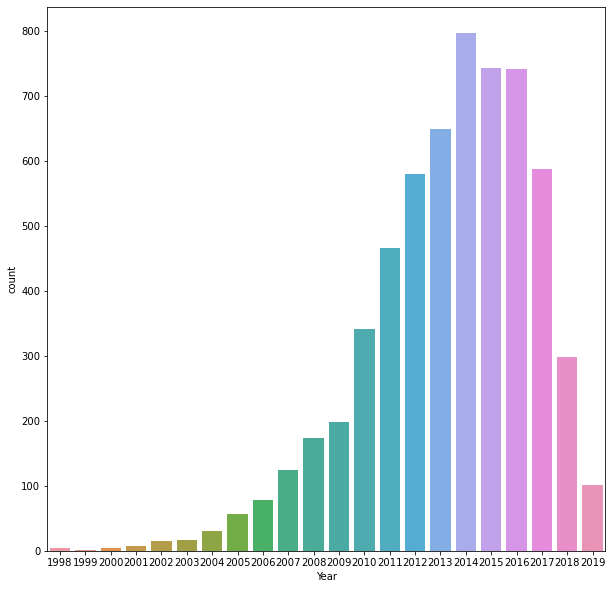

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(df['Year'])

## we can conclude from the above plot:
### 1-most of the cars in the used cars market manifactured between 2012 and 2017 which means that they are hte most accepted
### 2-there was a high inclination of slope after 2009


1998
0    3
1    1
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


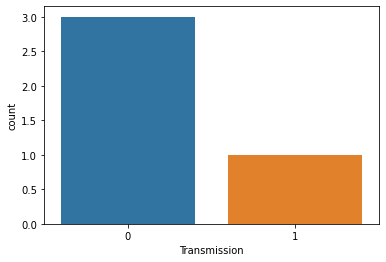

1999
0    2
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


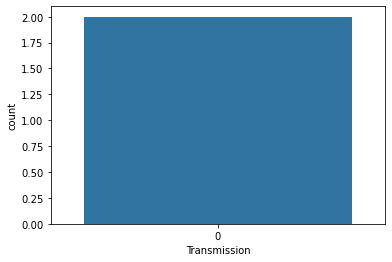

2000
0    4
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


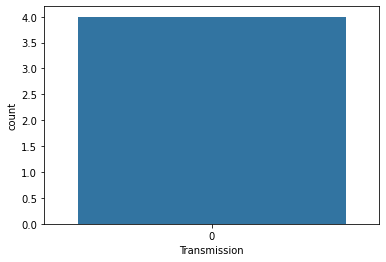

2001
0    8
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


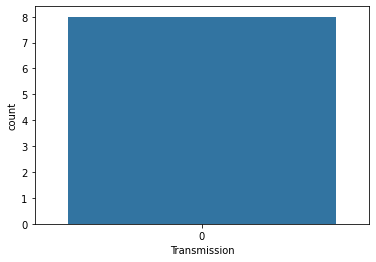

2002
0    15
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


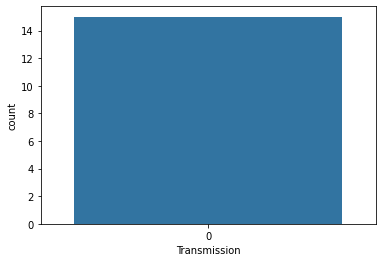

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2003
0    15
1     2
Name: Transmission, dtype: int64


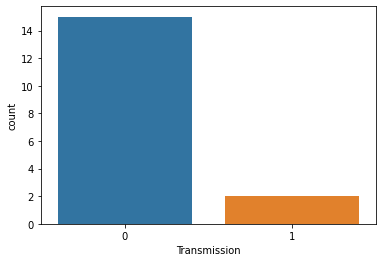

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2004
0    25
1     6
Name: Transmission, dtype: int64


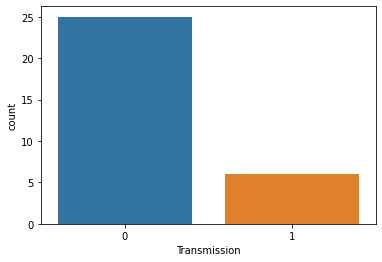

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2005
0    48
1     9
Name: Transmission, dtype: int64


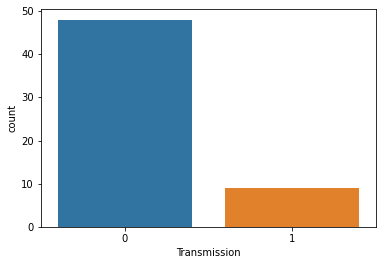

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2006
0    67
1    11
Name: Transmission, dtype: int64


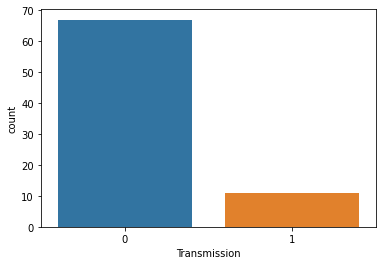

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2007
0    105
1     20
Name: Transmission, dtype: int64


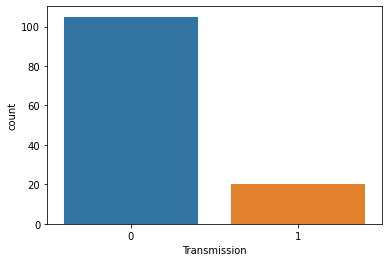

2008
0    132
1     42
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


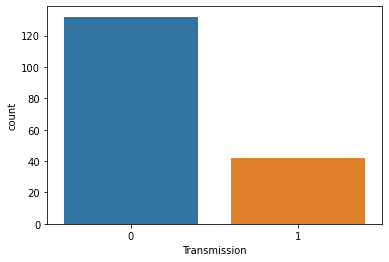

2009
0    131
1     67
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


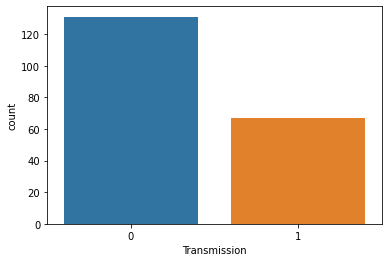

2010
0    265
1     77
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


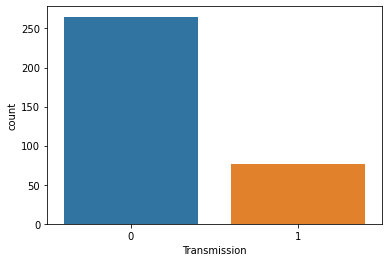

2011
0    334
1    132
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


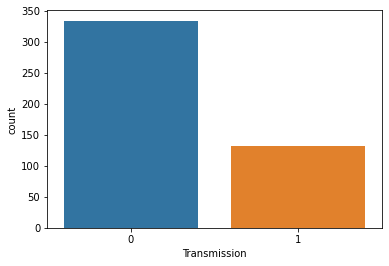

2012
0    433
1    147
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


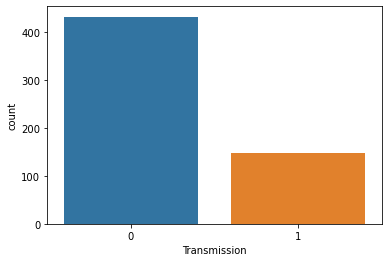

2013
0    469
1    180
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


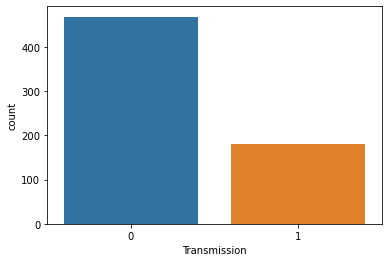

2014
0    572
1    225
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


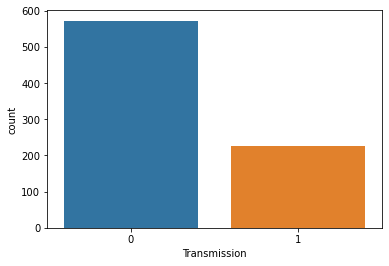

2015
0    523
1    221
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


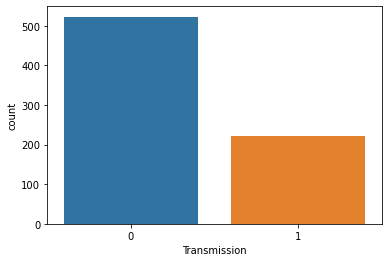

2016
0    512
1    229
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


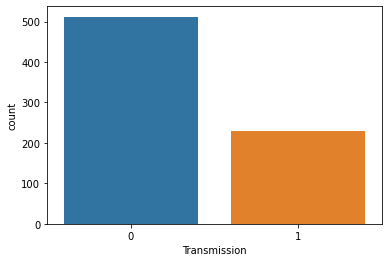

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


2017
0    389
1    198
Name: Transmission, dtype: int64


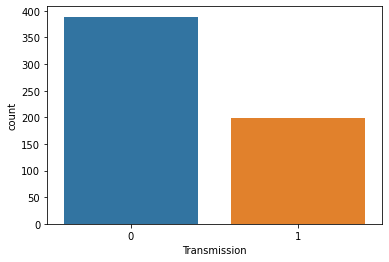

2018
0    191
1    107
Name: Transmission, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


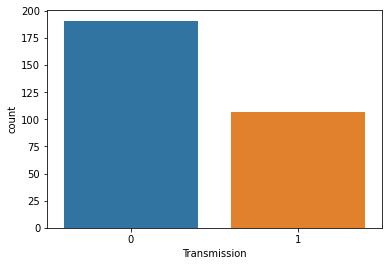

In [17]:
for i in range(1998,2019):
    print(i)
    print(df[df['Year']==i]['Transmission'].value_counts())
    plt.figure()
    sns.countplot(df[df['Year']==i]['Transmission'])
    plt.show()

### 3-most of people are trying to sell manual cars of model year 2007 and less because they are too tiring 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


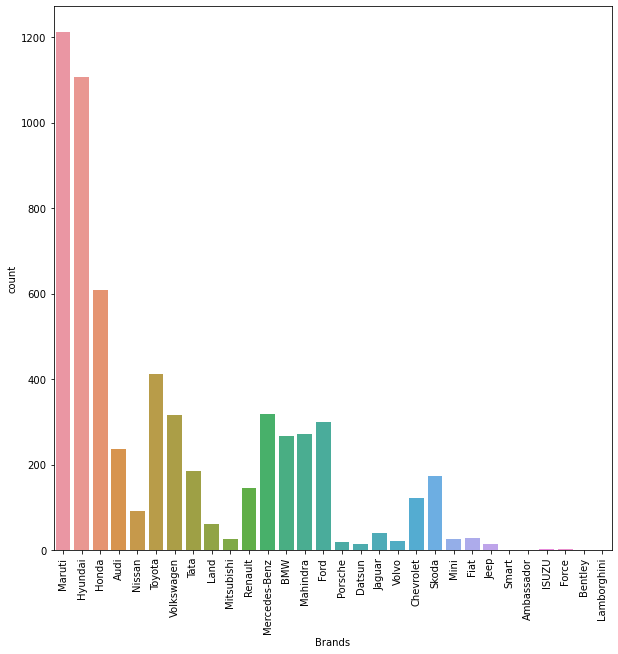

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(df['Brands'])
plt.xticks(rotation=90)
plt.show()

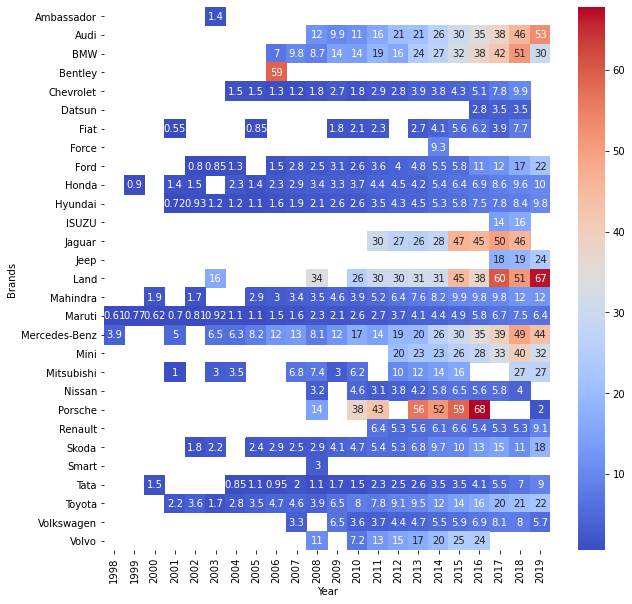

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(df.pivot_table(values='Price',index='Brands',columns=['Year']).drop('Lamborghini'),annot=True,cmap='coolwarm')
plt.show()

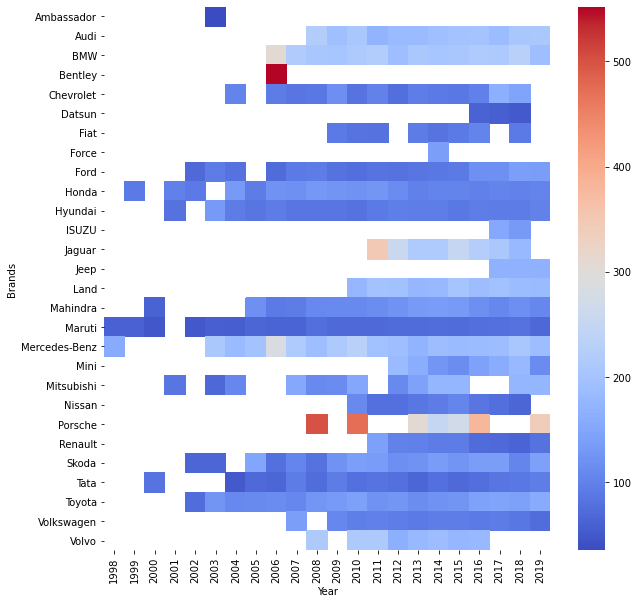

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.pivot_table(values='Power',index='Brands',columns=['Year']).drop('Lamborghini'),cmap='coolwarm')
plt.show()

## we have noticed from the above two heatmaps that therea re two brands that may have the same range of power but diffrence in prices due to their availability in the market (g.e :skoda and hyundai)

## Another thing we noticed that maruti has the biggest contribution in  the market because it is the car with medium features

## so we will try to make a new column that counts the cars in the market

In [21]:
df['Availability']=df['Brands'].replace({'Maruti'  :        1211
,'Hyundai'    :    1107
,'Honda'    :       608
,'Toyota'    :        411
,'Mercedes-Benz'   :  318
,'Volkswagen' :       315
,'Ford'      :      300
,'Mahindra'  :       272
,'BMW'   :          267
,'Audi'  :        236
,'Tata'   :        186
,'Skoda'   :          173
,'Renault'   :        145
,'Chevrolet'  :       121
,'Nissan' :            91
,'Land'   :            60
,'Jaguar'  :           40
,'Fiat'    :           28
,'Mitsubishi' :        27
,'Mini'      :         26
,'Volvo'      :        21
,'Porsche'    :        18
,'Jeep'     :          15
,'Datsun'  :           13
,'ISUZU'   :            3
,'Force'   :           3
,'Lamborghini':         1
,'Bentley' :            1
,'Smart'  :             1
,'Ambassador'   :       1
    
})

In [22]:
df.pivot_table(values='Price',index='Brands',columns=['Year']).index

Index(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat',
       'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Jaguar', 'Jeep',
       'Lamborghini', 'Land', 'Mahindra', 'Maruti', 'Mercedes-Benz', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Renault', 'Skoda', 'Smart', 'Tata',
       'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object', name='Brands')

### we notice that cars like land rovers can walk for longtime and can still be sold

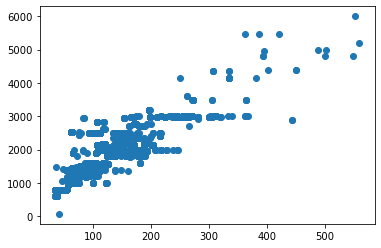

In [23]:
plt.figure()
plt.scatter(df['Power'],df['Engine'])
plt.show()

## we noticed that there is a good positive correlation
## we noticed also a weird bahaviour of graph that there is a big range of cars with 3000 CC

In [24]:
dfl=df[df['Engine']<=3100]
dfl=dfl[dfl['Engine']>=2900]
dfl.shape

(331, 15)

In [25]:
df.corr()

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,km/year,Availability
Year,1.000000,-0.173048,0.097059,-0.397152,0.296718,-0.052197,0.014525,0.012333,0.305327,-0.054577,0.016288
Kilometers_Driven,-0.173048,1.000000,-0.025663,0.085337,-0.064283,0.091068,0.033503,0.083113,-0.011493,-0.121483,-0.050044
Transmission,0.097059,-0.025663,1.000000,-0.008797,-0.361109,0.500381,0.643737,-0.075475,0.586025,0.006323,-0.341311
Owner_Type,-0.397152,0.085337,-0.008797,1.000000,-0.152376,0.050907,0.026088,0.014052,-0.097557,-0.010639,-0.040567
Mileage,0.296718,-0.064283,-0.361109,-0.152376,1.000000,-0.646476,-0.553764,-0.344770,-0.333263,-0.006317,0.403751
Engine,-0.052197,0.091068,0.500381,0.050907,-0.646476,1.000000,0.866185,0.393337,0.658354,-0.057974,-0.528732
Power,0.014525,0.033503,0.643737,0.026088,-0.553764,0.866185,1.000000,0.101562,0.772566,-0.016878,-0.466131
Seats,0.012333,0.083113,-0.075475,0.014052,-0.344770,0.393337,0.101562,1.000000,0.052225,-0.115701,-0.153835
Price,0.305327,-0.011493,0.586025,-0.097557,-0.333263,0.658354,0.772566,0.052225,1.000000,0.000750,-0.367828
km/year,-0.054577,-0.121483,0.006323,-0.010639,-0.006317,-0.057974,-0.016878,-0.115701,0.000750,1.000000,0.010125


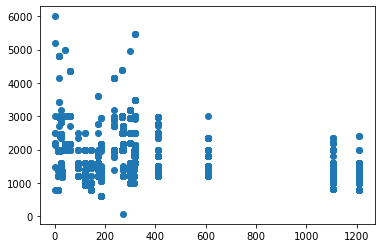

In [26]:
plt.scatter(df['Availability'],df['Engine'])

## we have noticed that there is a negative correlation between Engine feature and availability which makes sense because people does not tend to sell cars that can save up fuel money for them

In [27]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 42
Price                  0
Brands                 0
km/year                0
Availability           0
dtype: int64

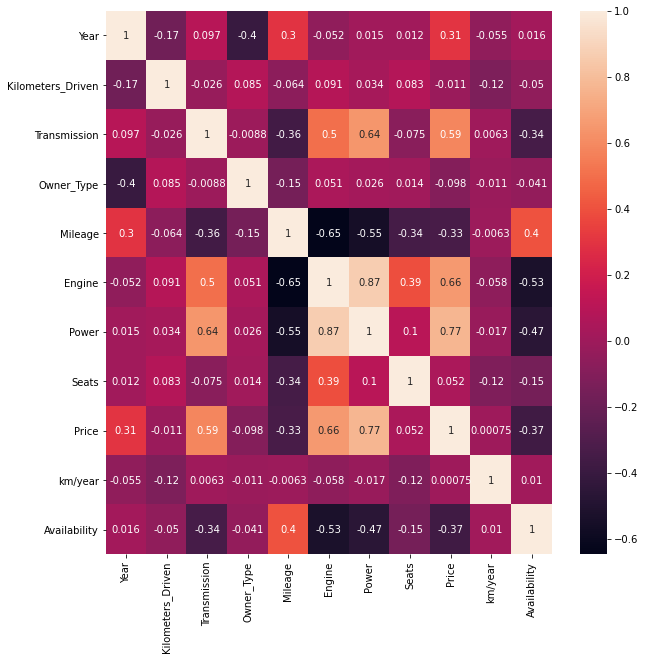

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## we can see that seats has nulls and no effect on the data so we can drop it 

In [29]:
df[df['Power'].isnull()].index 

Int64Index([  76,   79,   89,  120,  143,  194,  208,  227,  245,  262,
            ...
            5533, 5647, 5755, 5759, 5861, 5873, 5893, 5925, 5943, 5985],
           dtype='int64', length=143)

In [30]:
df[df['Engine'].isnull()].index

Int64Index([ 194,  208,  733,  749, 1294, 1327, 1385, 1460, 2074, 2096, 2264,
            2325, 2335, 2530, 2542, 2623, 2668, 2737, 2780, 2842, 3272, 3404,
            3520, 3522, 3810, 4011, 4152, 4229, 4577, 4604, 4697, 4712, 4952,
            5015, 5185, 5270],
           dtype='int64')

In [31]:
c=0
for i in df[df['Power'].isnull()].index :
    for j in df[df['Engine'].isnull()].index:
        if (i==j):
            print(i)
            c=c+1
print("num:", c)            

194
208
733
749
1294
1327
1385
1460
2074
2096
2264
2325
2335
2530
2542
2623
2668
2737
2780
2842
3272
3404
3520
3522
3810
4011
4152
4229
4577
4604
4697
4712
4952
5015
5185
5270
num: 36


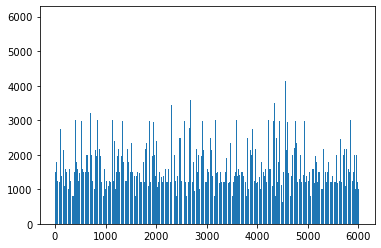

In [32]:
plt.figure()
plt.bar(np.arange(0,6019),df['Engine'])

plt.show()

<BarContainer object of 6019 artists>

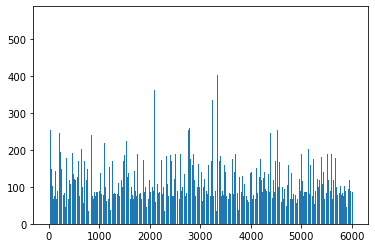

In [33]:
plt.bar(np.arange(0,6019),df['Power'])

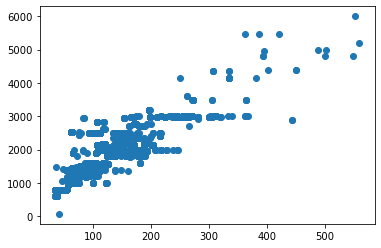

In [34]:
plt.scatter(df['Power'],df['Engine'])

In [35]:
X_nullreplace=np.array(df[['Engine','Transmission','Availability']].drop(df[df['Power'].isnull()].index)).reshape(5876,3)
y_nullreplace=np.array(df['Power'].drop(df[df['Power'].isnull()].index)).reshape(5876,1)
from sklearn.tree import DecisionTreeRegressor
Dtr=DecisionTreeRegressor(random_state=0,max_leaf_nodes=120)
Dtr.fit(X_nullreplace,y_nullreplace)
yDtr_pred_train=Dtr.predict(np.array(df[['Engine','Transmission','Availability']].drop(df[df['Power'].isnull()].index)).reshape(5876,3))


In [36]:
from sklearn.metrics import mean_squared_error 
mse=mean_squared_error(np.array(df['Power'].drop(df[df['Power'].isnull()].index)).reshape(5876,1),yDtr_pred_train)
print(1-(mse-df['Power'].min())/(df['Power'].max()-df['Power'].min())) #to get the error scaled

0.8519140973250221


In [37]:
df[df['Power'].isnull()].index

Int64Index([  76,   79,   89,  120,  143,  194,  208,  227,  245,  262,
            ...
            5533, 5647, 5755, 5759, 5861, 5873, 5893, 5925, 5943, 5985],
           dtype='int64', length=143)

In [38]:
for i in df[df['Power'].isnull()].index:
    if(i not in df[df['Engine'].isnull()].index ):
        df['Power'][i]= Dtr.predict(np.array(df[['Engine','Transmission','Availability']].iloc[i,:]).reshape(1,3))
        
    

<ipython-input-38-32ab852ef63a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'][i]= Dtr.predict(np.array(df[['Engine','Transmission','Availability']].iloc[i,:]).reshape(1,3))
<ipython-input-38-32ab852ef63a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Power'][i]= Dtr.predict(np.array(df[['Engine','Transmission','Availability']].iloc[i,:]).reshape(1,3))
<ipython-input-38-32ab852ef63a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [39]:
df.iloc[df[df['Mileage'].isnull()].index,:]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brands,km/year,Availability
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,1,2,NaN,2179.0,115.000000,5.0,17.50,Land,0.000094,60
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,1,1,NaN,1950.0,194.000000,5.0,35.67,Mercedes-Benz,0.000065,318
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,0,1,NaN,1086.0,66.634707,5.0,1.30,Hyundai,0.000171,1107
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,0,1,NaN,NaN,NaN,NaN,2.95,Honda,0.000217,608
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,0,1,NaN,1498.0,99.000000,NaN,3.60,Ford,0.000071,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Toyota Qualis Fleet A3,Mumbai,2001,227000,Diesel,0,4,NaN,2446.0,75.000000,8.0,2.20,Toyota,0.000084,411
5875,Mercedes-Benz C-Class Progressive C 220d,Ahmedabad,2019,4000,Diesel,1,1,NaN,1950.0,194.000000,5.0,35.00,Mercedes-Benz,0.000250,318
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,0,1,NaN,2112.0,133.951087,6.0,1.70,Mahindra,0.000240,272
5972,Hyundai Santro Xing GL,Mumbai,2008,65000,Petrol,0,2,NaN,1086.0,62.000000,5.0,1.39,Hyundai,0.000185,1107


In [40]:
df.drop('Seats',axis=1,inplace=True)


In [41]:
for i in df.index:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

3883
3884
3885
3886
3887
3888
3889
3890
3891
3892
3893
3894
3895
3896
3897
3898
3899
3900
3901
3902
3903
3904
3905
3906
3907
3908
3909
3910
3911
3912
3913
3914
3915
3916
3917
3918
3919
3920
3921
3922
3923
3924
3925
3926
3927
3928
3929
3930
3931
3932
3933
3934
3935
3936
3937
3938
3939
3940
3941
3942
3943
3944
3945
3946
3947
3948
3949
3950
3951
3952
3953
3954
3955
3956
3957
3958
3959
3960
3961
3962
3963
3964
3965
3966
3967
3968
3969
3970
3971
3972
3973
3974
3975
3976
3977
3978
3979
3980
3981
3982
3983
3984
3985
3986
3987
3988
3989
3990
3991
3992
3993
3994
3995
3996
3997
3998
3999
4000
4001
4002
4003
4004
4005
4006
4007
4008
4009
4010
4011
4012
4013
4014
4015
4016
4017
4018
4019
4020
4021
4022
4023
4024
4025
4026
4027
4028
4029
4030
4031
4032
4033
4034
4035
4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4049
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4061
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4082


In [42]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage              70
Engine               36
Power                36
Price                 0
Brands                0
km/year               0
Availability          0
dtype: int64

In [43]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Brands,km/year,Availability
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,0,1,26.60,998.0,58.16,1.75,Maruti,0.000139,1211
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,0,1,19.67,1582.0,126.20,12.50,Hyundai,0.000122,1107
2,Honda Jazz V,Chennai,2011,46000,Petrol,0,1,18.20,1199.0,88.70,4.50,Honda,0.000196,608
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,0,1,20.77,1248.0,88.76,6.00,Maruti,0.000092,1211
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,1,2,15.20,1968.0,140.80,17.74,Audi,0.000172,236


In [44]:
df['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

## so  we noticed that mileage that ends with 'km/kg' related to fuel type 'CNG' and 'LPG'


In [45]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,Brands,km/year,Availability
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,1,1,NaN,72.0,41.0,13.00,Mahindra,0.000080,272
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,1,1,NaN,1798.0,73.0,12.75,Toyota,0.000205,411


In [46]:
print("value count before drop:",'\n',df['Fuel_Type'].value_counts())
print("value count after drop:",'\n',df.dropna()['Fuel_Type'].value_counts())

value count before drop: 
 Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
value count after drop: 
 Diesel    3172
Petrol    2686
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64


In [47]:
for i in df[df['Fuel_Type'] =='CNG'].index:
    df['Mileage'][i]= round((float(df['Mileage'][i])/0.85),2)
for i in df[df['Fuel_Type'] =='LPG'].index:
    df['Mileage'][i]= round((float(df['Mileage'][i])/0.85),2)        
    


<ipython-input-47-49d2f2cbf0ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'][i]= round((float(df['Mileage'][i])/0.85),2)
<ipython-input-47-49d2f2cbf0ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mileage'][i]= round((float(df['Mileage'][i])/0.85),2)


In [48]:
df.dropna(inplace=True)

In [49]:
for i in df['Location'].unique():
    print("--------------------------------------------------------------------------------")
    print(i)
    print(df[df["Location"]==i].describe())

--------------------------------------------------------------------------------
Mumbai
              Year  Kilometers_Driven  Transmission  Owner_Type     Mileage  \
count   782.000000         782.000000    782.000000  782.000000  782.000000   
mean   2013.351662       44874.607417      0.381074    1.187980   17.564783   
std       3.093567       28691.026638      0.485962    0.443139    4.189540   
min    1998.000000         171.000000      0.000000    1.000000    7.940000   
25%    2011.000000       24000.000000      0.000000    1.000000   15.000000   
50%    2014.000000       41000.000000      0.000000    1.000000   17.400000   
75%    2016.000000       60000.000000      1.000000    1.000000   19.810000   
max    2019.000000      262000.000000      1.000000    4.000000   39.460000   

            Engine       Power       Price     km/year  Availability  
count   782.000000  782.000000  782.000000  782.000000    782.000000  
mean   1668.525575  121.388556    9.384233    0.000234    

In [50]:
df.drop(['Name','Brands'],axis=1,inplace=True)

In [51]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Price,km/year,Availability
0,Mumbai,2010,72000,CNG,0,1,31.29,998.0,58.16,1.75,0.000139,1211
1,Pune,2015,41000,Diesel,0,1,19.67,1582.0,126.20,12.50,0.000122,1107
2,Chennai,2011,46000,Petrol,0,1,18.20,1199.0,88.70,4.50,0.000196,608
3,Chennai,2012,87000,Diesel,0,1,20.77,1248.0,88.76,6.00,0.000092,1211
4,Coimbatore,2013,40670,Diesel,1,2,15.20,1968.0,140.80,17.74,0.000172,236


In [130]:

df.shape,df.drop_duplicates().shape

((5924, 12), (5922, 12))

In [52]:
df_gd=pd.get_dummies(df)

In [103]:
from sklearn.preprocessing import MinMaxScaler
df_gd_sc=pd.DataFrame(MinMaxScaler().fit_transform(df_gd),columns=df_gd.columns)
df_sc=pd.DataFrame(MinMaxScaler().fit_transform(df.drop(['Fuel_Type','Location'],axis=1)),columns=df.drop(['Fuel_Type','Location'],axis=1).columns)

In [54]:
df_gd_sc

,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage,Engine,Power,Price,km/year,Availability,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0.571429,0.011051,0.0,0.000000,0.752874,0.069594,0.045569,0.008210,0.013428,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.809524,0.006282,0.0,0.000000,0.401391,0.178266,0.174971,0.075583,0.011785,0.914050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.619048,0.007051,0.0,0.000000,0.356927,0.106997,0.103652,0.025445,0.018934,0.501653,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,0.013359,0.0,0.000000,0.434664,0.116115,0.103766,0.034846,0.008875,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.714286,0.006231,1.0,0.333333,0.266183,0.250093,0.202739,0.108423,0.016651,0.194215,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5919,0.761905,0.004184,0.0,0.000000,0.665457,0.116115,0.075694,0.027012,0.021224,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5920,0.809524,0.015359,0.0,0.000000,0.544465,0.092296,0.069989,0.022311,0.004805,0.914050,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5921,0.666667,0.008435,0.0,0.333333,0.229885,0.348716,0.147965,0.015417,0.014065,0.223967,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5922,0.714286,0.007051,0.0,0.000000,0.378100,0.069594,0.062571,0.013851,0.014717,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [104]:
from sklearn.model_selection import train_test_split
X=df_sc.drop('Price',axis=1)
y=df_sc['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2002)

## 1-Decision Tree

In [105]:
from sklearn.tree import DecisionTreeRegressor
Dtr=DecisionTreeRegressor(random_state=2002)
Dtr.fit(X_train,y_train)
yDtr_pred_train=Dtr.predict(X_train)
yDtr_pred_test=Dtr.predict(X_test)

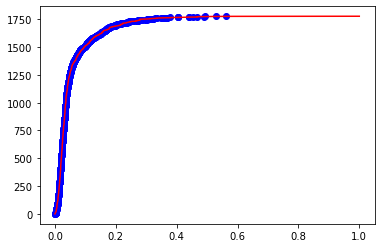

In [106]:
yDtr_pred_test.sort()
plt.figure()
plt.plot(yDtr_pred_test,np.arange(0,1778),c='red')
plt.scatter(y_test.sort_values(),np.arange(0,1778),c='blue')
plt.show()  

In [107]:
print("train accuracy:  ",(1-mean_squared_error(y_train,yDtr_pred_train))*100,'\n',
"test accuracy:  ",(1-mean_squared_error(y_test,yDtr_pred_test))*100)

train accuracy:   99.99995610065325 
 test accuracy:   99.0358447019788


In [125]:
from sklearn.tree import DecisionTreeRegressor
Dtr=DecisionTreeRegressor(random_state=2002,min_weight_fraction_leaf=0.03,min_samples_split=30,max_features=5)
Dtr.fit(X_train,y_train)
yDtr_pred_train=Dtr.predict(X_train)
yDtr_pred_test=Dtr.predict(X_test)

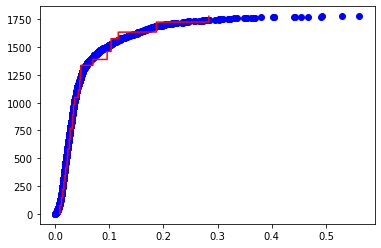

In [126]:
yDtr_pred_test.sort()
plt.figure()
plt.plot(yDtr_pred_test,np.arange(0,1778),c='red')
plt.scatter(y_test.sort_values(),np.arange(0,1778),c='blue')
plt.show()  

In [127]:
print("train accuracy:  ",(1-mean_squared_error(y_train,yDtr_pred_train))*100,'\n',
"test accuracy:  ",(1-mean_squared_error(y_test,yDtr_pred_test))*100)

train accuracy:   99.85562754158798 
 test accuracy:   99.20782884927395


## 2-Random Forest Tree

In [111]:
from sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor(random_state=2002)
Rfr.fit(X_train,y_train)
yRfr_pred_train=Rfr.predict(X_train)
yRfr_pred_test=Rfr.predict(X_test)

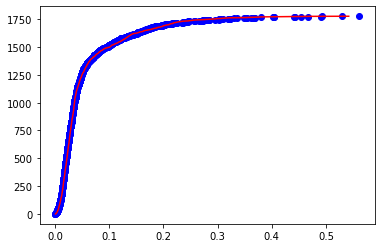

In [131]:
yRfr_pred_test.sort()
plt.figure()
plt.plot(yRfr_pred_test,np.arange(0,1778),c='red')
plt.scatter(y_test.sort_values(),np.arange(0,1778),c='blue')
plt.show()  

In [132]:
print("train accuracy:  ",(1-mean_squared_error(y_train,yRfr_pred_train))*100,'\n',
"test accuracy:  ",(1-mean_squared_error(y_test,yRfr_pred_test))*100)

train accuracy:   99.99140007634428 
 test accuracy:   99.13402844494698


In [133]:
from sklearn.ensemble import RandomForestRegressor
Rfr=RandomForestRegressor(n_estimators=20,random_state=2002)
Rfr.fit(X_train,y_train)
yRfr_pred_train=Rfr.predict(X_train)
yRfr_pred_test=Rfr.predict(X_test)

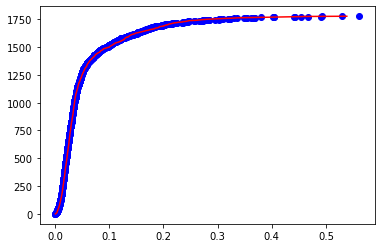

In [134]:
yRfr_pred_test.sort()
plt.figure()
plt.plot(yRfr_pred_test,np.arange(0,1778),c='red')
plt.scatter(y_test.sort_values(),np.arange(0,1778),c='blue')
plt.show()  

In [135]:
print("train accuracy:  ",(1-mean_squared_error(y_train,yRfr_pred_train))*100,'\n',
"test accuracy:  ",(1-mean_squared_error(y_test,yRfr_pred_test))*100)

train accuracy:   99.98961159184846 
 test accuracy:   99.11550210153581
